In [61]:
import cv2 as cv2
import numpy as np
import pandas as pd

In [2]:
img_grechka= cv2.imread('/content/drive/MyDrive/Accenture/гречка.jpg')
img_perec=cv2.imread('/content/drive/MyDrive/Accenture/перец.jpg')

In [3]:
grechka = np.array(cv2.cvtColor(img_grechka,cv2.COLOR_BGR2HSV))
perec = np.array(cv2.cvtColor(img_perec,cv2.COLOR_BGR2HSV))

In [4]:
grechka_pull=[]
for elem in grechka:
  if [elem in perec]==True:
   
    pass
  else:
    flag=0
    if grechka_pull !=[]:
      for n in range(len(grechka_pull)):
        if elem in grechka_pull[n]:
          flag=1
      if flag==0:
        grechka_pull.append(elem)

perec_pull=[]
for elem in perec:
  if [elem in grechka]==True:
   
    pass
  else:
    flag=0
    if perec_pull !=[]:
      for n in range(len(perec_pull)):
        if elem in perec_pull[n]:
          flag=1
      
    if flag==0:
      perec_pull.append(elem)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [5]:
img= cv2.imread('/content/drive/MyDrive/Accenture/Вагоны/20211203_152859.jpg')
img= np.array(cv2.cvtColor(img,cv2.COLOR_BGR2HSV))

In [6]:
grechka_count=0
perec_count=0
for elem in img:
  for el in elem:
    
    if elem in grechka:
      grechka_count+=1
    if elem in perec:
      perec_count+=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [115]:

#print('Гречки'+ str(grechka_count))

#print('Перец'+ str(perec_count))
if grechka_count+perec_count !=0:
  brak=perec_count/(grechka_count+perec_count)
  #print("Брак =" + str(brak*100)+"%")


In [137]:
def get_mark(lotok):
  mark = np.random.uniform(low=0.0, high=0.015)
  return mark

In [138]:
def razgruzka(vagon, lotok, max_iters=100, is_printing=True):
  logs = pd.DataFrame(columns=[ 'brak_vagon', 'brak_lotok'])
  flag_vagon = 0
  flag_lotok = 0
  flag_iter = 0
  flag_while = 0

  
  for iter in range(max_iters):
    flag_iter ==1
    

    mark_vagon = get_mark(vagon)
    mark_lotok = get_mark(lotok)
    logs.loc[iter, 'brak_vagon']=mark_vagon
    logs.loc[iter, 'brak_lotok']=mark_lotok

    

    if is_printing:
      print('Брака в вагоне, %', str(mark_vagon))
      print('Брака в лотке, %', str(mark_lotok))
      #print(logs)



    if mark_lotok >=0.01:
      flag_lotok +=1
    else:
      flag_lotok=0

    if flag_vagon == 1:
      if is_printing:
        print("Разгрузка завершена по причине выявления брака в вагоне на стадии {0:.2%} разгрузки".format(flag_iter/max_iters))
      return False, logs, logs.loc[iter, 'brak_vagon']
    if flag_lotok ==5:
      if is_printing:
        print("Разгрузка завершена по причине выявления брака в лотке на стадии {0:.2%} разгрузки".format(flag_iter/max_iters))
      sum_value=0
      for n in range(flag_lotok-1):

        sum_value += logs.loc[iter-n, 'brak_lotok']
      last_value = sum_value/flag_lotok
      return False, logs, last_value
  if is_printing:
        print('Разгрузка завершена успешно')
  mean_value = logs['brak_lotok'].mean()
  return True, logs, mean_value


In [139]:
_, _,_ =razgruzka(90100001, 1, 100, True)

Брака в вагоне, % 0.0039033048247695355
Брака в лотке, % 0.014554333871131477
Брака в вагоне, % 0.011976930665265879
Брака в лотке, % 0.01054609312924595
Брака в вагоне, % 0.014149394882463475
Брака в лотке, % 0.004299423904423489
Брака в вагоне, % 0.014410209336057191
Брака в лотке, % 0.01207285917402675
Брака в вагоне, % 0.0021031257418577774
Брака в лотке, % 0.014695182789278147
Брака в вагоне, % 0.012038842001594401
Брака в лотке, % 0.005198447530938944
Брака в вагоне, % 0.0010971942818630014
Брака в лотке, % 0.0012143015785026567
Брака в вагоне, % 0.0039036703338915795
Брака в лотке, % 0.014183587070909939
Брака в вагоне, % 0.006564031740032345
Брака в лотке, % 0.00014433940767471286
Брака в вагоне, % 0.0007662933005610306
Брака в лотке, % 0.014676467945349944
Брака в вагоне, % 0.006136436858847962
Брака в лотке, % 0.002592270023248695
Брака в вагоне, % 0.00813926936544406
Брака в лотке, % 0.013295892726874816
Брака в вагоне, % 0.012768582677794321
Брака в лотке, % 0.0139578382157

In [180]:
vagons = pd.DataFrame(columns=['vagon', 'lotok', 'kol_parts', 'razgruzka', 'log_file', 'brak_%'])
for iter in range(22):
  vagons.loc[iter, 'vagon']='9010000'+str(iter+1)
  vagons.loc[iter, 'lotok']=vagons.loc[iter, 'vagon']
  vagons.loc[iter, 'kol_parts']=100
  is_not_stopped, log, brak = razgruzka(vagons.loc[iter, 'vagon'], vagons.loc[iter, 'lotok'], vagons.loc[iter, 'kol_parts'], False)
  logname = 'log'+str(iter)+'.csv'
  log.to_csv(logname)
  vagons.loc[iter, 'log_file'] = logname
  if is_not_stopped==False:
    vagons.loc[iter, 'razgruzka'] = 'Возвращен'
  else:
    vagons.loc[iter, 'razgruzka'] = 'Разгружен'
  vagons.loc[iter, 'brak_%'] = brak
print(vagons)

        vagon      lotok kol_parts  razgruzka   log_file      brak_%
0    90100001   90100001       100  Разгружен   log0.csv  0.00816469
1    90100002   90100002       100  Разгружен   log1.csv  0.00772552
2    90100003   90100003       100  Разгружен   log2.csv  0.00686223
3    90100004   90100004       100  Разгружен   log3.csv  0.00792862
4    90100005   90100005       100  Разгружен   log4.csv  0.00756543
5    90100006   90100006       100  Разгружен   log5.csv  0.00728391
6    90100007   90100007       100  Разгружен   log6.csv  0.00699686
7    90100008   90100008       100  Разгружен   log7.csv  0.00792743
8    90100009   90100009       100  Разгружен   log8.csv   0.0076333
9   901000010  901000010       100  Разгружен   log9.csv  0.00744046
10  901000011  901000011       100  Разгружен  log10.csv  0.00742416
11  901000012  901000012       100  Возвращен  log11.csv  0.00956519
12  901000013  901000013       100  Разгружен  log12.csv   0.0081744
13  901000014  901000014       100

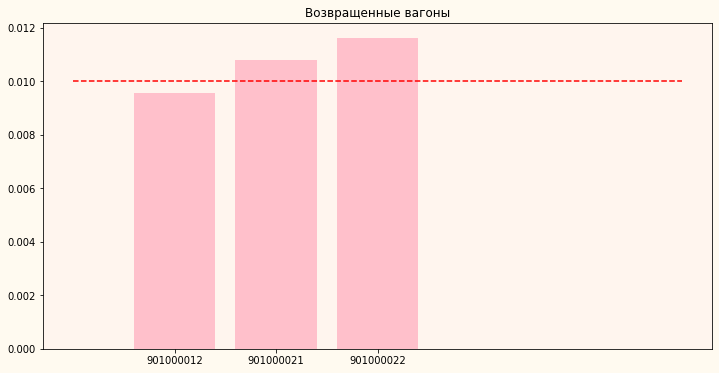

In [182]:
import numpy as np
import matplotlib.pyplot as plt



fig, ax = plt.subplots()

ax.bar(vagons[vagons['razgruzka']=='Возвращен']['vagon'], vagons[vagons['razgruzka']=='Возвращен']['brak_%'], color = 'PINK')
ax.hlines(0.01,-1, 5, color = 'red',linestyles= '--')
ax.set_title('Возвращенные вагоны')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()